In [ ]:

!pip install requests beautifulsoup4 lxml pandas urllib3


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from urllib.parse import urljoin


In [ ]:
url = "http://books.toscrape.com/catalogue/page-1.html"
response = requests.get(url)
soup = BeautifulSoup(response.text, "lxml")

books = soup.select("article.product_pod")

data = []
for book in books:
    title = book.h3.a["title"]
    price = book.select_one(".price_color").text
    availability = book.select_one(".availability").get_text(strip=True)
    rating = book.p["class"][1]  # e.g., "Three"
    data.append([title, price, availability, rating])

df = pd.DataFrame(data, columns=["Title","Price","Availability","Rating"])
df.head()


,Title,Price,Availability,Rating
0,A Light in the Attic,Â£51.77,In stock,Three
1,Tipping the Velvet,Â£53.74,In stock,One
2,Soumission,Â£50.10,In stock,One
3,Sharp Objects,Â£47.82,In stock,Four
4,Sapiens: A Brief History of Humankind,Â£54.23,In stock,Five


In [ ]:
all_books = []
url = "http://books.toscrape.com/catalogue/page-1.html"

while url:
    print("Scraping:", url)
    r = requests.get(url)
    soup = BeautifulSoup(r.text, "lxml")

    books = soup.select("article.product_pod")
    for book in books:
        title = book.h3.a["title"]
        price = book.select_one(".price_color").text
        availability = book.select_one(".availability").get_text(strip=True)
        rating = book.p["class"][1]
        all_books.append([title, price, availability, rating])

    # find next page
    next_btn = soup.select_one("li.next a")
    if next_btn:
        url = urljoin(url, next_btn["href"])
    else:
        url = None

df = pd.DataFrame(all_books, columns=["Title","Price","Availability","Rating"])
df.shape
df


Scraping: http://books.toscrape.com/catalogue/page-1.html
Scraping: http://books.toscrape.com/catalogue/page-2.html
Scraping: http://books.toscrape.com/catalogue/page-3.html
Scraping: http://books.toscrape.com/catalogue/page-4.html
Scraping: http://books.toscrape.com/catalogue/page-5.html
Scraping: http://books.toscrape.com/catalogue/page-6.html
Scraping: http://books.toscrape.com/catalogue/page-7.html
Scraping: http://books.toscrape.com/catalogue/page-8.html
Scraping: http://books.toscrape.com/catalogue/page-9.html
Scraping: http://books.toscrape.com/catalogue/page-10.html
Scraping: http://books.toscrape.com/catalogue/page-11.html
Scraping: http://books.toscrape.com/catalogue/page-12.html
Scraping: http://books.toscrape.com/catalogue/page-13.html
Scraping: http://books.toscrape.com/catalogue/page-14.html
Scraping: http://books.toscrape.com/catalogue/page-15.html
Scraping: http://books.toscrape.com/catalogue/page-16.html
Scraping: http://books.toscrape.com/catalogue/page-17.html
Scrapi

,Title,Price,Availability,Rating
0,A Light in the Attic,Â£51.77,In stock,Three
1,Tipping the Velvet,Â£53.74,In stock,One
2,Soumission,Â£50.10,In stock,One
3,Sharp Objects,Â£47.82,In stock,Four
4,Sapiens: A Brief History of Humankind,Â£54.23,In stock,Five
...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,Â£55.53,In stock,One
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Â£57.06,In stock,Four
997,A Spy's Devotion (The Regency Spies of London #1),Â£16.97,In stock,Five
998,1st to Die (Women's Murder Club #1),Â£53.98,In stock,One


In [ ]:
# 1. Standardize column names
df.columns = df.columns.str.lower().str.replace(" ", "_")

# 2. Trim whitespace from all text columns
for col in ["title", "availability"]:
    df[col] = df[col].str.strip()

# 3. Drop duplicates (sometimes sites repeat items across pages)
df = df.drop_duplicates(subset=["title"]).reset_index(drop=True)

# 4. Fix missing values
df["price"] = df["price"].fillna(0)   # replace missing price with 0
df["rating"] = df["rating"].fillna(0) # unrated → 0 stars

# 5. Create useful derived columns
df["is_in_stock"] = df["availability"].str.contains("In stock", case=False)
df


,title,price,availability,rating,is_in_stock
0,A Light in the Attic,Â£51.77,In stock,Three,True
1,Tipping the Velvet,Â£53.74,In stock,One,True
2,Soumission,Â£50.10,In stock,One,True
3,Sharp Objects,Â£47.82,In stock,Four,True
4,Sapiens: A Brief History of Humankind,Â£54.23,In stock,Five,True
...,...,...,...,...,...
994,Alice in Wonderland (Alice's Adventures in Won...,Â£55.53,In stock,One,True
995,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Â£57.06,In stock,Four,True
996,A Spy's Devotion (The Regency Spies of London #1),Â£16.97,In stock,Five,True
997,1st to Die (Women's Murder Club #1),Â£53.98,In stock,One,True


In [ ]:
print("Dataset shape:", df.shape)

# Check missing values
print("\nMissing values per column:")
print(df.isna().sum())

# Check duplicates
print("\nDuplicate titles:", df.duplicated("title").sum())

# Price range validation
print("\nPrice stats:")
print(df["price"].describe())

# Ratings validation (should be 0–5 only)
print("\nUnique ratings:", df["rating"].unique())




Dataset shape: (999, 5)

Missing values per column:
title           0
price           0
availability    0
rating          0
is_in_stock     0
dtype: int64

Duplicate titles: 0

Price stats:
count         999
unique        902
top       Â£27.88
freq            3
Name: price, dtype: object

Unique ratings: ['Three' 'One' 'Four' 'Five' 'Two']


In [ ]:
df.to_csv("books_clean.csv", index=False)
from google.colab import files
files.download("books_clean.csv")





<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

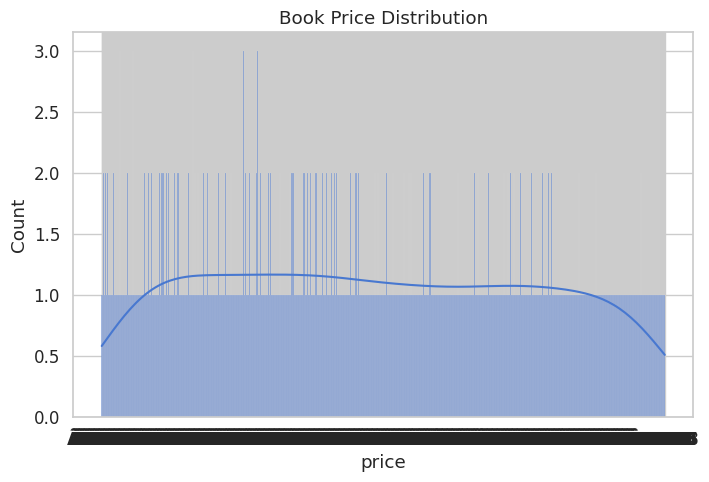

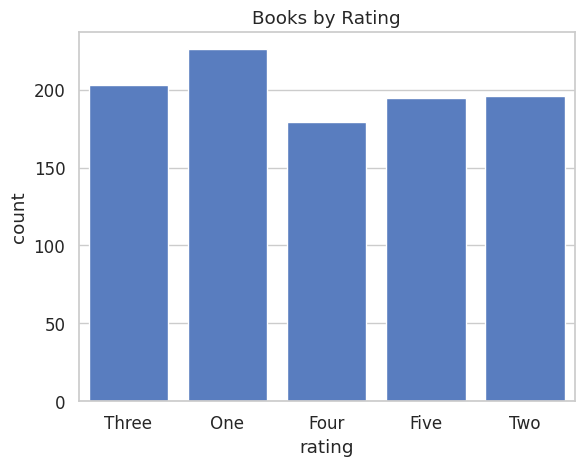

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df["price"], bins=20, kde=True)
plt.title("Book Price Distribution")
plt.show()

sns.countplot(x="rating", data=df)
plt.title("Books by Rating")
plt.show()
